# Execution Tutorial

- - -

This notebook demonstrates about how to execute the optimization program.

First, you need configuration file for setting arguments of quantum circuit and optimization process.

This program takes batch of arguments by YAML file, and you need to set list of arguments in your YAML file.

For Example,

- - -

```yaml
num_qubit: 1            # number of qubits in circuit

freq: 3.0e+6            # detuning frequency

t2: 2.2e-6              # T2* dephasing time

gamma: 0.0              # post-selection factor

t_obs: 2.094395e-5      # time interval to observe

num_points: 500         # number of timepoints in the interval

opt: 'Adam'            # optimization method (LBFGS or Adam)

steps_per_point: 1000    # maximum optimization steps per timepoint

patience: 5             # maximum patience limit

threshold: 1.0e-13       # patience threshold

save_to: 'test.npy'     # file path to save data
```

- - -

You need to set **ALL** arguments above, or program will not run appropriately.

Now, all you need to do is running the command line below.

Be careful that you need to replace file path to **your own config file's path**.

In [1]:
!python main.py config.yaml

CFI = 1.000000 at timepoint 0.00000000, Param = ['1.570796', '1.570696'], Iter left = 499, Remaining time = 201.77 sec
CFI = 0.962563 at timepoint 0.00000004, Param = ['1.727352', '1.570796'], Iter left = 498, Remaining time = 793.05 sec
CFI = 0.926527 at timepoint 0.00000008, Param = ['1.883907', '1.570796'], Iter left = 497, Remaining time = 981.66 sec
CFI = 0.891840 at timepoint 0.00000013, Param = ['2.040462', '1.570796'], Iter left = 496, Remaining time = 1056.54 sec
CFI = 0.858452 at timepoint 0.00000017, Param = ['2.197018', '1.570796'], Iter left = 495, Remaining time = 1110.57 sec
CFI = 0.826313 at timepoint 0.00000021, Param = ['2.353573', '1.570796'], Iter left = 494, Remaining time = 1674.58 sec
CFI = 0.795378 at timepoint 0.00000025, Param = ['2.510128', '1.570796'], Iter left = 493, Remaining time = 1615.48 sec
CFI = 0.765601 at timepoint 0.00000029, Param = ['2.666683', '1.570796'], Iter left = 492, Remaining time = 1577.35 sec
CFI = 0.736939 at timepoint 0.00000034, Par

- - -

Below code is slightly modified version of main.py for demonstration of plotting optimized CFI and parameters.

In [2]:
import argparse

import numpy as np

from utils.utils import *
from utils.customparser import customparser
from OptimizationCircuit import OptimizationCircuit
from Trainer import *

In [3]:
custom_parser = customparser('config.yaml')  # Your config file path goes here.
parsed_args = custom_parser.parse_custom_args()

# Define quantum circuit
circ = OptimizationCircuit(parsed_args[0])

# Optimize for CFI
data = fit(circ, parsed_args[1])

# Save data
np.save(parsed_args[2].save_to, data.detach().numpy())

c:\Users\LCY\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


CFI = 1.000000 at timepoint 0.00000000, Param = ['1.570796', '1.570696'], Iter left = 499, Remaining time = 216.46 sec
CFI = 0.962563 at timepoint 0.00000004, Param = ['1.727352', '1.570796'], Iter left = 498, Remaining time = 865.33 sec
CFI = 0.926527 at timepoint 0.00000008, Param = ['1.883907', '1.570796'], Iter left = 497, Remaining time = 1036.11 sec
CFI = 0.891840 at timepoint 0.00000013, Param = ['2.040462', '1.570796'], Iter left = 496, Remaining time = 1126.25 sec
CFI = 0.858452 at timepoint 0.00000017, Param = ['2.197018', '1.570796'], Iter left = 495, Remaining time = 1190.27 sec
CFI = 0.826313 at timepoint 0.00000021, Param = ['2.353573', '1.570796'], Iter left = 494, Remaining time = 1810.67 sec
CFI = 0.795378 at timepoint 0.00000025, Param = ['2.510128', '1.570796'], Iter left = 493, Remaining time = 1752.74 sec
CFI = 0.765601 at timepoint 0.00000029, Param = ['2.666683', '1.570796'], Iter left = 492, Remaining time = 1709.82 sec
CFI = 0.736939 at timepoint 0.00000034, Pa

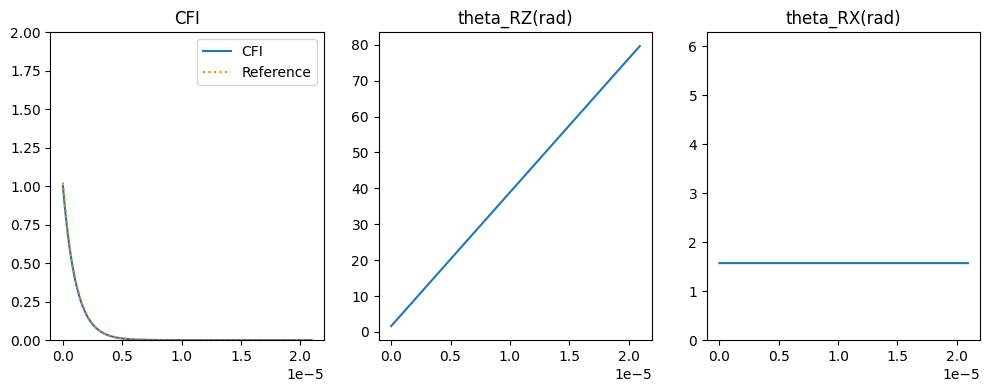

In [6]:
# Plot data
data = data.detach().numpy()
k = 1 / (parsed_args[0].freq * parsed_args[0].t2)
plot_data(data, parsed_args[0].num_qubit, k, parsed_args[0].freq)